<center><h1>Plan Pathology</h1></center>
<hr>

# thanks to...

**Kaggle Kernel**
> [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy?scriptVersionId=2051374)  
> [Plant Pathology 2020 : EDA + Models](https://www.kaggle.com/tarunpaparaju/plant-pathology-2020-eda-models)

**Problem Askes**
> [OpenCV - How to Read Image Data in Python](https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html)

# table of contents <a id="top"></a>
1. [Define the Problem](#1)
2. [Gather the Data](#2)
3. [Prepare Data for Consumption](#3)
    1. [Import Library](#3.1)
    2. [Load Dataset](#3.2)
    3. [Data Cleaning](#3.3)
        1. [Correcting](#3.3.1)
        2. [Creating](#3.3.2)
        3. [Completing](#3.3.3)
        4. [Converting](#3.3.4)
            1. [Binning](#3.3.4.1)
            2. [Categorical Value Coding](#3.3.4.2)
            3. [Dummy Value Coding](#3.3.4.3)
4. [Perform Exploratory Analysis with Statistics](#4)
5. [Model Data](#5)
    1. [Extract Features and Labels for Modeling](#5.1)
    2. [Machine Learning Modeling](#5.2)
    3. [Hyper Parameter Tuning](#5.3)
    4. [Feature Tuning](#5.4)
6. [Validate and Implement](#6)
    1. [Ensemble](#6.1)

<hr>

# 1. Define the Problem <a id="1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

[**Specific Objectives** - from Kaggle](https://www.kaggle.com/c/plant-pathology-2020-fgvc7/overview/description)<br> 
> Objectives of ‘Plant Pathology Challenge’ are to train a model using images of training dataset to 
> 
> 1) Accurately classify a given image from testing dataset into different diseased category or a healthy leaf  
> 2) Accurately distinguish between many diseases, sometimes more than one on a single leaf  
> 3) Deal with rare classes and novel symptoms  
> 4) Address depth perception—angle, light, shade, physiological age of the leaf  
> 5) Incorporate expert knowledge in identification, annotation, quantification, and guiding computer vision to search for relevant features during learning.  

# 2. Gather the Data <a id="2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

[**Data Description** - from Kaggle](https://www.kaggle.com/c/plant-pathology-2020-fgvc7/data)
> Given a photo of an apple leaf, can you accurately assess its health? This competition will challenge you to distinguish between leaves which are healthy, those which are infected with apple rust, those that have apple scab, and those with more than one disease.

> **train.csv**  
> image_id: the foreign key for the parquet files  
> combinations: one of the target labels  
> healthy: one of the target labels  
> rust: one of the target labels  
> scab: one of the target labels  
>  
> **images**  
> A folder containing the train and test images, in jpg format  
>  
> **test.csv**  
> image_id: the foreign key for the parquet files  
>  
> **sample_submission.csv**  
> image_id: the foreign key for the parquet files  
> combinations: one of the target labels  
> healthy: one of the target labels  
> rust: one of the target labels  
> scab: one of the target labels  

# 3. Perpare Data for Consumption <a id="3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

## 3.1. Import Library <a id="3.1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [1]:
### Python Standard Library
import os

### Numerical Library
import numpy as np

### Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

### DataFrame Library
import pandas as pd

### Image Library
import cv2

### Machine Learning Library
from sklearn.model_selection import train_test_split

### Deep Learning Library
import tensorflow as tf
import tensorflow.keras as keras

## 3.2. Load Dataset <a id="3.2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

<br>**CSV Files**

In [2]:
train_raw_df = pd.read_csv('./data/train.csv')
test_raw_df = pd.read_csv('./data/test.csv')

In [3]:
train_raw_df

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [4]:
test_raw_df

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


<br>**Image Files**

In [5]:
def get_image(image_id):
    sample_image_path = './data/images/' + image_id + '.jpg'
    sample_image = cv2.imread(sample_image_path, cv2.IMREAD_UNCHANGED)
    return sample_image

In [6]:
sample_image = get_image(train_raw_df.loc[3, 'image_id'])

In [7]:
print('Shape of Image {}'.format(sample_image.shape))
print(sample_image)

Shape of Image (1365, 2048, 3)
[[[ 70 138 103]
  [ 70 138 103]
  [ 70 138 103]
  ...
  [ 40 100  76]
  [ 41 101  77]
  [ 41 101  77]]

 [[ 70 138 103]
  [ 70 138 103]
  [ 70 138 103]
  ...
  [ 41 101  77]
  [ 41 101  77]
  [ 41 101  77]]

 [[ 70 138 103]
  [ 70 138 103]
  [ 70 138 103]
  ...
  [ 41 101  77]
  [ 42 102  78]
  [ 42 102  78]]

 ...

 [[ 85 100  79]
  [ 86 101  80]
  [ 85 102  81]
  ...
  [ 60 132 120]
  [ 60 132 120]
  [ 61 133 121]]

 [[ 83  98  77]
  [ 83  98  77]
  [ 82  99  78]
  ...
  [ 60 132 120]
  [ 60 132 120]
  [ 60 132 120]]

 [[ 82  97  76]
  [ 82  97  76]
  [ 81  98  77]
  ...
  [ 61 133 121]
  [ 60 132 120]
  [ 60 132 120]]]


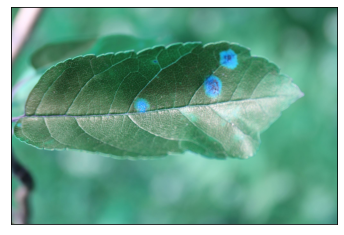

In [8]:
plt.imshow(sample_image)
plt.xticks([])
plt.yticks([])
plt.show()

## 3.3. Data Cleaning <a id="3.3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [9]:
train_raw_df.isna().sum()

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64

In [10]:
test_raw_df.isna().sum()

image_id    0
dtype: int64

# 4. Perform Exploratory Data Analysis <a id="4"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

# 5. Model Data <a id="5"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

## 5.1. Prepare Dataset <a id="5.1"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [11]:
train_images_path = ('./data/images/' + train_raw_df['image_id'] + '.jpg').tolist()
train_labels = np.asarray(train_raw_df.loc[:, 'healthy':])
assert len(train_images_path) == train_labels.shape[0]

In [12]:
test_images_path = ('./data/images/' + test_raw_df['image_id'] + '.jpg').tolist()
test_images_path

['./data/images/Test_0.jpg',
 './data/images/Test_1.jpg',
 './data/images/Test_2.jpg',
 './data/images/Test_3.jpg',
 './data/images/Test_4.jpg',
 './data/images/Test_5.jpg',
 './data/images/Test_6.jpg',
 './data/images/Test_7.jpg',
 './data/images/Test_8.jpg',
 './data/images/Test_9.jpg',
 './data/images/Test_10.jpg',
 './data/images/Test_11.jpg',
 './data/images/Test_12.jpg',
 './data/images/Test_13.jpg',
 './data/images/Test_14.jpg',
 './data/images/Test_15.jpg',
 './data/images/Test_16.jpg',
 './data/images/Test_17.jpg',
 './data/images/Test_18.jpg',
 './data/images/Test_19.jpg',
 './data/images/Test_20.jpg',
 './data/images/Test_21.jpg',
 './data/images/Test_22.jpg',
 './data/images/Test_23.jpg',
 './data/images/Test_24.jpg',
 './data/images/Test_25.jpg',
 './data/images/Test_26.jpg',
 './data/images/Test_27.jpg',
 './data/images/Test_28.jpg',
 './data/images/Test_29.jpg',
 './data/images/Test_30.jpg',
 './data/images/Test_31.jpg',
 './data/images/Test_32.jpg',
 './data/images/Test

In [13]:
train_images_path, val_images_path, train_labels, val_labels = train_test_split(
    train_images_path, 
    train_labels, 
    test_size=0.1
)

In [14]:
len(train_images_path)

1638

In [15]:
train_labels.shape

(1638, 4)

In [16]:
len(val_images_path)

183

In [17]:
val_labels.shape

(183, 4)

In [18]:
def decode_image(image_path, label=None, image_size=(512, 512)):
    bits = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, image_size)
    
    if label is None:
        return image
    else:
        return image, label

In [19]:
def data_augment(image, label=None):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    if label is None:
        return image
    else:
        return image, label

In [20]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images_path, train_labels))
train_dataset = train_dataset.map(decode_image)
train_dataset = train_dataset.map(data_augment)
train_dataset = train_dataset.shuffle(3000)
train_dataset = train_dataset.prefetch(3000)
train_dataset = train_dataset.batch(64)
train_dataset = train_dataset.repeat()

In [21]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images_path, val_labels))
val_dataset = val_dataset.map(decode_image)
val_dataset = val_dataset.batch(64)

In [22]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images_path))
test_dataset = test_dataset.map(decode_image)
test_dataset = test_dataset.batch(64)

## 5.2. Dataset Modeling <a id="5.2"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [23]:
class PlantPathologyModel(keras.Model):
    def __init__(self):
        
        super(PlantPathologyModel, self).__init__()
        
        self.conv1 = keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', name='conv2', activation='relu')
        self.maxpool1 = keras.layers.MaxPooling2D(strides=2, name='maxpool1')

        self.conv2 = keras.layers.Conv2D(filters=32, kernel_size=4, padding='same', name='conv2', activation='relu')
        self.maxpool2 = keras.layers.MaxPooling2D(strides=2, name='maxpool2')
        self.flatten2 = keras.layers.Flatten(name='flatten2')

        self.dense3 = keras.layers.Dense(units=512, name='dense3', activation='relu')
        self.drop3 = keras.layers.Dropout(0.5, name='drop3')

        self.dense4 = keras.layers.Dense(units=512, name='dense4', activation='relu')
        self.drop4 = keras.layers.Dropout(0.5, name='drop4')
        
        self.dense5 = keras.layers.Dense(units=4, name='dense5', activation='sigmoid')

        
    def call(self, inputs, training=False):

        layer1 = self.conv1(inputs)
        layer1 = self.maxpool1(layer1)

        layer2 = self.conv2(layer1)
        layer2 = self.maxpool2(layer2)
        layer2 = self.flatten2(layer2)
        
        layer3 = self.dense3(layer2)
        layer3 = self.drop3(layer3)

        layer4 = self.dense4(layer3)
        layer4 = self.drop4(layer4)

        outputs = self.dense5(layer4)
        return outputs

In [24]:
model = PlantPathologyModel()
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])

In [25]:
temp = keras.Input(shape=(512, 512, 3))
model(temp)
model.summary()

Model: "plant_pathology_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2 (Conv2D)               (None, 512, 512, 32)      416       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 256, 256, 32)      0         
_________________________________________________________________
conv2 (Conv2D)               (None, 256, 256, 32)      16416     
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 128, 128, 32)      0         
_________________________________________________________________
flatten2 (Flatten)           (None, 524288)            0         
_________________________________________________________________
dense3 (Dense)               (None, 512)               268435968 
_________________________________________________________________
drop3 (Dropout)              (None, 512)     

## 5.3. Hyper Parameter <a id="5.3"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [26]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    keras.optimizers.schedules.ExponentialDecay(0.001, 10, 0.8), 
    verbose=1
)

In [27]:
EPOCHS = 10
STEPS_FOR_EPOCH = train_labels.shape[0] // 64 

## 5.4. Training <a id="5.4"></a> 
<p style='text-align: right;'><a href="#top">🔝top</a></p>

In [ ]:
history = model.fit(
    train_dataset, 
    epochs=EPOCHS, 
    steps_per_epoch=STEPS_FOR_EPOCH, 
    callbacks=[lr_schedule], 
    validation_data=val_dataset, 
    verbose=1
)

Train for 25 steps, validate for 3 steps

Epoch 00001: LearningRateScheduler reducing learning rate to tf.Tensor(0.001, shape=(), dtype=float32).
Epoch 1/10
25/25 [==============================] - 744s 30s/step - loss: 1.9556 - categorical_accuracy: 0.2756 - val_loss: 1.5808 - val_categorical_accuracy: 0.3333

Epoch 00002: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009779328, shape=(), dtype=float32).
Epoch 2/10
25/25 [==============================] - 644s 26s/step - loss: 1.8690 - categorical_accuracy: 0.2751 - val_loss: 1.5808 - val_categorical_accuracy: 0.3333

Epoch 00003: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009563525, shape=(), dtype=float32).
Epoch 3/10
25/25 [==============================] - 616s 25s/step - loss: 1.8938 - categorical_accuracy: 0.2814 - val_loss: 1.5808 - val_categorical_accuracy: 0.3333

Epoch 00004: LearningRateScheduler reducing learning rate to tf.Tensor(0.0009352485, shape=(), dtype=float32).
Epoch 4/10
25/25 [==

# 6. Validate and Implement